# 딥 러닝을 이용한 자연어 처리 입문

아래 링크의 E-book을 보고 실습한 내용입니다.

WikiDocs 주소: https://wikidocs.net/31766


# 6장 토픽 모델링

## 1절 잠재 의미 분석 (Latent Semantic Analysis, LSA)

## 잠재 의미 분석 (Latent Semantic Analysis, LSA)

In [1]:
import numpy as np
import pandas as pd

In [10]:
# DTM 구하기
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

# 문서 d에 vocab의 단어 t가 몇 번 등장하는지
# Term frequency를 구한다.
A = []
for i in range(len(docs)):
    A.append([])
    d = docs[i]
    for t in vocab:
        A[-1].append(d.count(t))

A = pd.DataFrame(A, columns=vocab)

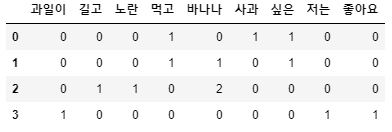

In [3]:
# 4 X 9 크기의 DTM에 Full SVD 수행
# U: Left singular vector
# V: Right signular vector
# s: 특이값들의 리스트 -> 대각 행렬로 바꿔줘야 함

U, s, VT = np.linalg.svd(A, full_matrices=True)
print("U", np.shape(U), "\n", U.round(2))
print("\ns", np.shape(s), "\n", s.round(2))
print("\nVT", np.shape(VT), "\n", VT.round(2))


U (4, 4) 
 [[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]

s (4,) 
 [2.69 2.05 1.73 0.77]

VT (9, 9) 
 [[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


In [4]:
# s를 토대로 대각행렬 S를 만들어준다.

S = np.zeros((4, 9))   # 4 X 9 크기의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 대각원소로 s의 값들을 삽입
print("S", np.shape(S), "\n", S.round(2))

S (4, 9) 
 [[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


특이값 분해 식 (이를 토대로 복원도 가능하다.)
$$A = U\Sigma V^T$$

In [5]:
# 원본 행렬 복원 후 np.allclose로 동일한지 파악
print("원본 행렬 복원 결과:", np.allclose(A, np.dot(np.dot(U, S), VT).round(2)))


원본 행렬 복원 결과: True


In [6]:
# Truncated SVD 수행
t = 2
S = S[:t, :t]
print(f"상위 {t}개의 특이값만 남긴 결과:")
print(S.round(2))

상위 2개의 특이값만 남긴 결과:
[[2.69 0.  ]
 [0.   2.05]]


In [7]:
# U도 t개의 열만 남기고 제거해준다.
U = U[:, :t]

print(f"{t}개의 열만 남긴 행렬 U:")
print(U.round(2))

# V의 전치행렬인 VT는 t개의 행만 남기고 제거해준다. (전치했으니까 행)
VT = VT[:t, :]
print(f"\n{t}개의 헹만 남긴 행렬 VT:")
print(VT.round(2))

2개의 열만 남긴 행렬 U:
[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]

2개의 헹만 남긴 행렬 VT:
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [8]:
# Truncated SVD의 결과로 근사한 행렬 A_prime으로 복원
A_prime = np.dot(np.dot(U, S), VT)
print(np.array(A))
print()
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]

[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.    0.    0.    0.  ]]
